## PROJECT: ANALYSIS OF SUDAN CONFLICT(1997-2024) ##


Violent conflict in Africa has been the leading cause of deaths, injuries, destruction of homes, displacement of populations and and restriction on freedom of expressions. This project is interested exploring the roles of various conflict actors in Sudan conflict and how they impact on civilian fatalities. The dataset for the project is obatined from Armed Conflict Location Events Tracking Data (ACled  at https://acleddata.com/curated-data-files/#regional*). 

The project seeks to identify the event_types related to violence and related actors. The project will identify the regions with the higest count of fatalities and will project the trends of violent accross time. 



# Business problem #

Multilateral agencies and humanitarain organisations are providing aid in Sudan but needs to know prevalence of conflict in Sudan and national actors responsbile for violation of human rights. There is need for situational awareness about the pattern of conflcit and the categories of populations suffering from violence.


# Data understanding #

The dataset is large but focus is on fatalities, event-types, actors and locations at risk of violent conflict. The overal goal is estbalish a linear relationship between fatalities and violent events.

## 1: Importing the neccessary python libraries and loading the data ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv(r'C:\Users\pgaduel\Desktop\Gaduel_Phase3_Project\Sudan_1997-2024_Dec06.csv')
print(df.columns)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')


##  2: Data inspection, cleaning and preprocessing ##

In [2]:
#Inspecting the dataset

print("Shape of the data:", df.shape)
Rows,Cols=df.shape
df.head()

Shape of the data: (35057, 31)


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,SUD31794,12/6/2024,2024,1,Political violence,Battles,Armed clash,Military Forces of Sudan (2019-),NaN,State forces,...,El Fasher,13.6264,25.3559,1,Twitter; WikiLeaks - El Fasher 'Darfur News',New media,"On 6 December 2024, SAF airstrikes targeted RS...",0,NaN,1733789073
1,SUD31815,12/6/2024,2024,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Sudan),NaN,Protesters,...,Malha,15.0934,26.1591,1,Darfur 24; WikiLeaks - El Fasher 'Darfur News',New media-Subnational,"On 6 December 2024, residents staged a protest...",1,crowd size=no report,1733789073
2,SUD31831,12/6/2024,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),NaN,State forces,...,Khartoum North - Shambat,15.6594,32.5300,1,Alhamish Voice; Beam reports; Emergency Lawyer...,New media-National,"On 6 December 2024, SAF airstrikes targeted a ...",5,NaN,1733789073
3,SUD31839,12/6/2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Sudan),NaN,Protesters,...,Sunta,11.0432,25.6139,1,Darfur 24,Subnational,"On 6 December 2024, residents staged a protest...",0,crowd size=no report,1733789073
4,SUD31842,12/6/2024,2024,2,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Sudan (2019-),NaN,State forces,...,Al Sharif Wad El Obeid,14.4121,33.7298,1,Twitter,New media,Movement of forces: Around 6 December 2024 (as...,0,NaN,1733789073


In [3]:
# Selecting certain columns
selected_columns = ['year','disorder_type', 'event_type' , 'actor1', 'inter1',  'location', 'fatalities', 'actor1', 'admin1', 'geo_precision', 'source_scale']

# Creating a new DataFrame with selected columns

df_selected = df[selected_columns]

df_selected.head(10)


,year,disorder_type,event_type,actor1,inter1,location,fatalities,actor1,admin1,geo_precision,source_scale
0,2024,Political violence,Battles,Military Forces of Sudan (2019-),State forces,El Fasher,0,Military Forces of Sudan (2019-),North Darfur,1,New media
1,2024,Political violence; Demonstrations,Protests,Protesters (Sudan),Protesters,Malha,1,Protesters (Sudan),North Darfur,1,New media-Subnational
2,2024,Political violence,Explosions/Remote violence,Military Forces of Sudan (2019-),State forces,Khartoum North - Shambat,5,Military Forces of Sudan (2019-),Khartoum,1,New media-National
3,2024,Demonstrations,Protests,Protesters (Sudan),Protesters,Sunta,0,Protesters (Sudan),South Darfur,1,Subnational
4,2024,Strategic developments,Strategic developments,Military Forces of Sudan (2019-),State forces,Al Sharif Wad El Obeid,0,Military Forces of Sudan (2019-),Al Jazirah,1,New media
5,2024,Political violence,Explosions/Remote violence,Military Forces of Sudan (2019-),State forces,Um Talha,8,Military Forces of Sudan (2019-),Al Jazirah,1,International
6,2024,Strategic developments,Strategic developments,Military Forces of Sudan (2019-),State forces,Um Algura,0,Military Forces of Sudan (2019-),Al Jazirah,2,New media
7,2024,Political violence,Explosions/Remote violence,Military Forces of Sudan (2019-),State forces,Ombada,10,Military Forces of Sudan (2019-),Khartoum,1,National
8,2024,Political violence,Violence against civilians,Murle Ethnic Militia (South Sudan),Identity militia,Yuai,1,Murle Ethnic Militia (South Sudan),Jonglei,3,National
9,2024,Political violence,Battles,Unidentified Communal Militia (South Sudan),Identity militia,Cueibet,0,Unidentified Communal Militia (South Sudan),Lakes,2,National


In [4]:
print(df_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35057 entries, 0 to 35056
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           35057 non-null  int64 
 1   disorder_type  35057 non-null  object
 2   event_type     35057 non-null  object
 3   actor1         35057 non-null  object
 4   inter1         35057 non-null  object
 5   location       35057 non-null  object
 6   fatalities     35057 non-null  int64 
 7   actor1         35057 non-null  object
 8   admin1         35057 non-null  object
 9   geo_precision  35057 non-null  int64 
 10  source_scale   35057 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB
None


In [5]:
df_selected.shape

(35057, 11)

_the dataset has 35057 rows and 11 columns_

<Axes: >

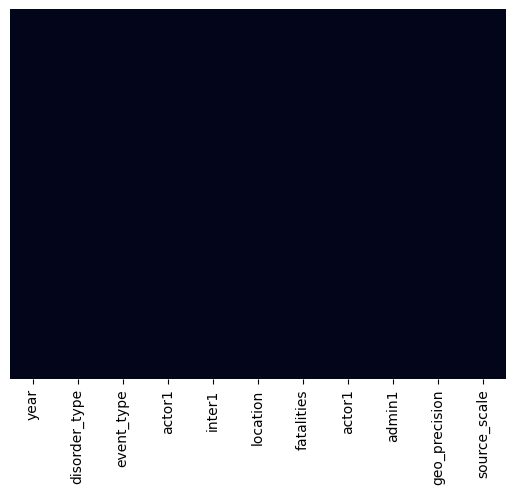

In [6]:
#Visulising missing values through heatmap
sns.heatmap(df_selected.isnull(), yticklabels=False, cbar=False)

The heatmap shows there are no missing or null values

## 3: Expploratory data Analysis ##

 **Understanding the data and preparing the target Variables**

The aim of this step is to map conflict in Sudan by type for example;  disorder_type (e.g., "Protests", "Battles", etc.) 

 *What is the most common source of violence in Sudan?*

In [7]:
print(df_selected['event_type'].value_counts())

event_type
Battles                       11282
Violence against civilians     9355
Protests                       6282
Explosions/Remote violence     4058
Strategic developments         3086
Riots                           994
Name: count, dtype: int64


_The battles are the most common violent events in Sudan_

C:\Users\pgaduel\AppData\Local\Temp\ipykernel_29480\793652818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.values, y=event_counts.index, palette='viridis')


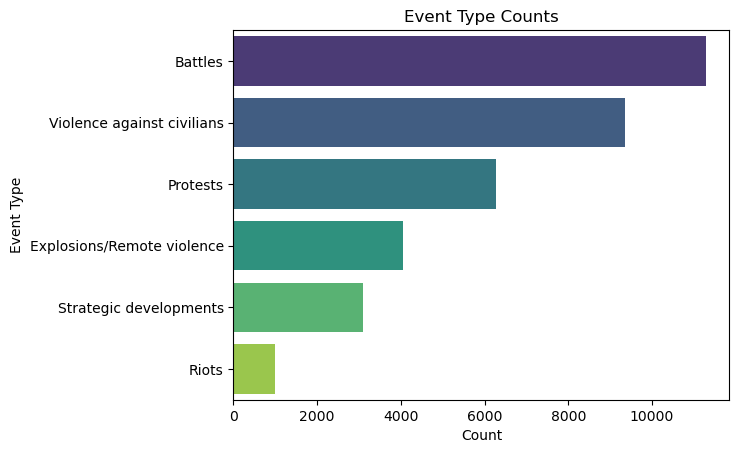

In [8]:
# Count occurrences of each 'event_type'

event_counts = df_selected['event_type'].value_counts()

# Create a barplot
sns.barplot(x=event_counts.values, y=event_counts.index, palette='viridis')

# Add titles and labels
plt.title('Event Type Counts')
plt.xlabel('Count')
plt.ylabel('Event Type')

# Display the plot
plt.show()

_Battles are the leading types of violence, followed by violence against civilains_.

_Riots are the least common disorder types in Sudan_.

In [9]:
import plotly.express as px

# Calculate the value counts of event types
event_type = df_selected["event_type"].value_counts()

# Create a pie chart using Plotly
fig = px.pie(event_type, values=event_type.values, names=event_type.index, title='Total Type of Event percentage in Sudan')
# Show the plot

fig.show()

_The pie_chart shows the propportions of violent in Sudan by event percentage._

_Battles constitute the largest proportion of violence_.

In [10]:
# Group by event_type and sub_event_type and count the occurrences
sub_event = df.groupby(["event_type", "sub_event_type"])["event_date"].agg({'count'}).reset_index()

# Create a sunburst chart using Plotly
fig = px.sunburst(sub_event, 
                  path=['event_type', 'sub_event_type'], 
                  values='count',
                  width=600, # Width of map
                  height=600)

fig.update_traces(textinfo="label+percent parent")
fig.layout.update(title="<b> Event type and Sub event type percentage in Sudan (ACLED)<b>",
                  titlefont={'color':None, 'size': 15, 'family': 'San-Serif'})

fig.show()

_Based on the sunburst chart, armed clashes constitute the largest source of sub_violent events._


_Attacks , and peaceful protests are other major categories that trigger violence._

Who is responsible for most of violent counts in Sudan?

In [11]:
#Summary of events by actor_type1
actor_type1=df["inter1"].value_counts()
actor_type1

inter1
State forces             13484
Identity militia          6309
Protesters                6218
Political militia         4889
Rebel group               2715
Rioters                    941
External/Other forces      360
Civilians                  141
Name: count, dtype: int64

_the state forces are the leading perpertrators responsbile for violence in Sudan_.


_violence by civilians is the least_.

C:\Users\pgaduel\AppData\Local\Temp\ipykernel_29480\2717016390.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




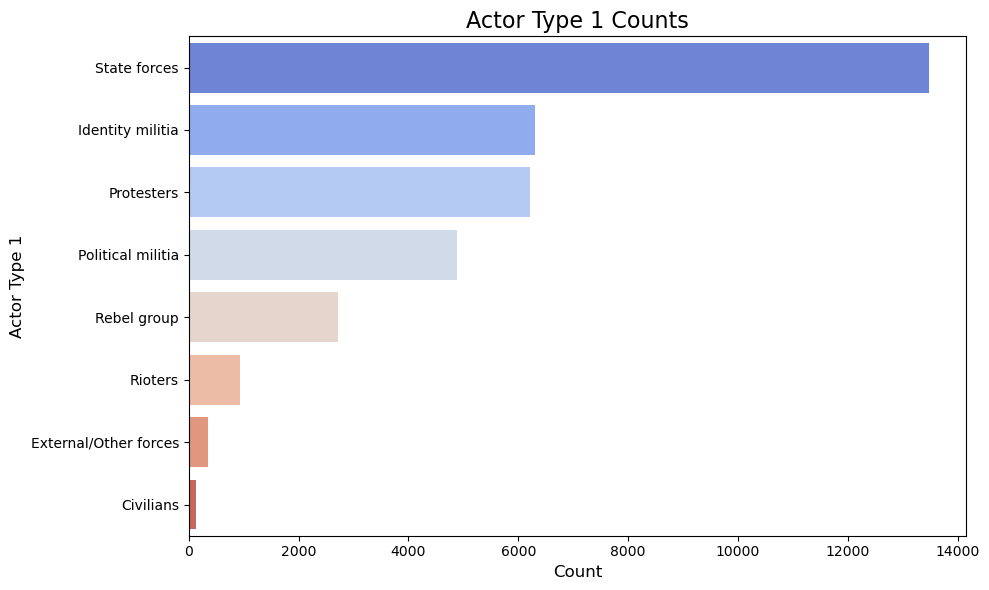

In [12]:
# Count occurrences of each 'inter1' value
actor_type1 = df["inter1"].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_type1.values, y=actor_type1.index, palette='coolwarm')

# Add titles and labels
plt.title('Actor Type 1 Counts', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Actor Type 1', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

_The bar chart shows that state forces are the leading source of violent conflict in Sudan_.

In [13]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add pie charts to subplots
fig.add_trace(go.Pie(labels=actor_type1.index, values=actor_type1, name="Actor type1"), 1, 1)
#fig.add_trace(go.Pie(labels=actor_type2.index, values=actor_type2, name="Actor type2"), 1, 2)

# Update traces to create donut-like pie charts
fig.update_traces(hole=.6, hoverinfo="label+percent+name")

# Update layout with title and annotations
fig.update_layout(
    title="<b> Actor type involved in Sudan conflict<b>",
    titlefont={'color':None, 'size': 20, 'family': 'San-Serif'},
    height=600,
    width=1000,
    annotations=[
        dict(text='<b>instigator', x=0.16, y=0.5, font_size=20, showarrow=False),
        dict(text='<b>victim/hit back', x=0.88, y=0.5, font_size=20, showarrow=False)
    ]
)

# Show the plot
fig.show()

**Based on the visualization of the instigators (Actor type1) involved in the Sudan conflict, several insights can be drawn:**

_The state forces are the main dominant actors in Sudan conflict responsible for most fatalities._


_The civilians are least perpertartors_


_What are the top 10 regions of Sudan with the higest count of fatalities?_

C:\Users\pgaduel\AppData\Local\Temp\ipykernel_29480\1969468016.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




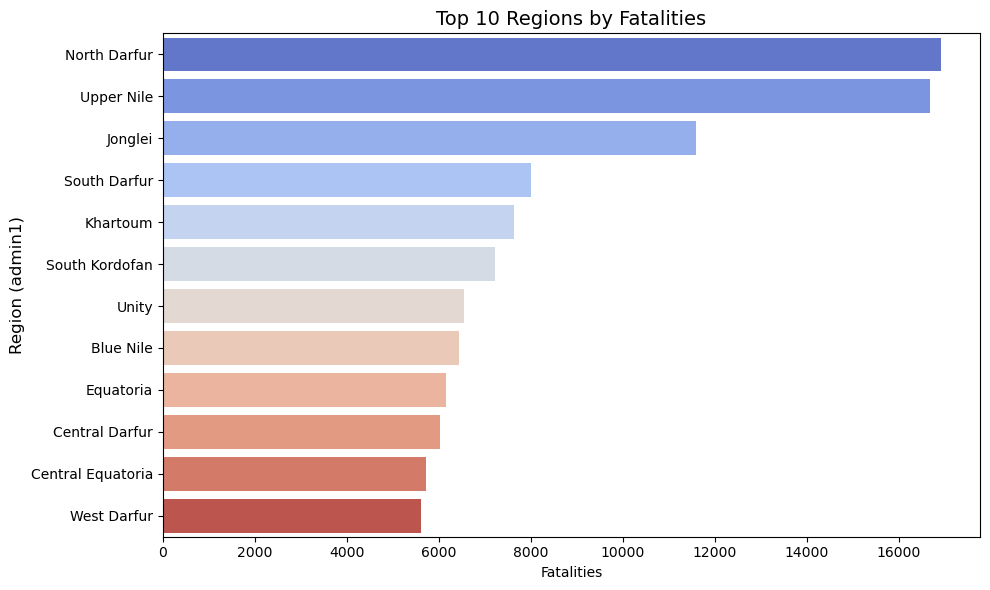

In [14]:
# Grouping by 'admin1', summing, and sorting by 'fatalities'
df_grouped = df_selected.groupby('admin1').sum().sort_values(by='fatalities', ascending=False)

# Selecting the top 10 rows
top_10 = df_grouped.head(12).reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='fatalities', y='admin1', palette='coolwarm')

# Add titles and labels
plt.title('Top 10 Regions by Fatalities', fontsize=14)
plt.xlabel('Fatalities', fontsize=10)
plt.ylabel('Region (admin1)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

_According to the bar chart, North Darfur, and Upper Nile region has the higest count of fatalities in Sudan_

 Which particular period did Sudan recored the higest number of fatalities?

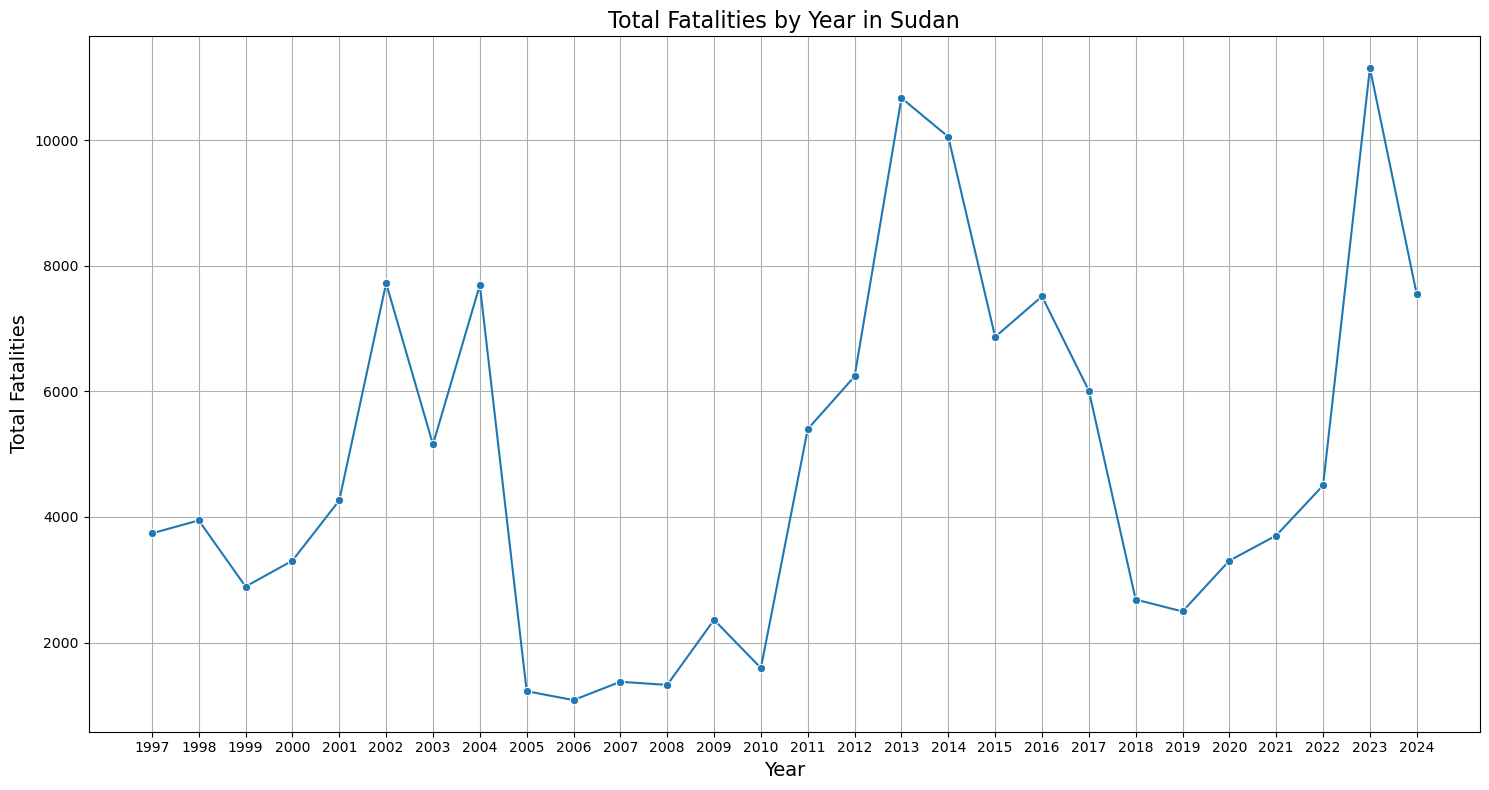

In [15]:
# Aggregate fatalities by year
fatalities_by_year = df_selected.groupby('year')['fatalities'].sum().reset_index()
# Create the plot using seaborn (Alternative, often preferred for aesthetics)
plt.figure(figsize=(15, 8))
sns.lineplot(x='year', y='fatalities', data=fatalities_by_year, marker='o') #using seaborn lineplot
plt.title('Total Fatalities by Year in Sudan', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fatalities', fontsize=14)
plt.xticks(fatalities_by_year['year']) #Set x ticks to be the years
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Processing Feature engineering ##

In [16]:
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures


Hotencoding of categorical values in the dataset

In [17]:
df_encoded = pd.get_dummies(df_selected, dtype=int)
df_encoded.head(10)

,year,fatalities,geo_precision,disorder_type_Demonstrations,disorder_type_Political violence,disorder_type_Political violence; Demonstrations,disorder_type_Strategic developments,event_type_Battles,event_type_Explosions/Remote violence,event_type_Protests,...,source_scale_Other-National,source_scale_Other-New media,source_scale_Other-Regional,source_scale_Other-Subnational,source_scale_Regional,source_scale_Regional-International,source_scale_Subnational,source_scale_Subnational-International,source_scale_Subnational-National,source_scale_Subnational-Regional
0,2024,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2024,5,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2024,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2024,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024,8,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2024,0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2024,10,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,2024,1,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2024,0,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Feature selection with filter method to remove redundant variables 

In [18]:
df_encoded = pd.DataFrame(df_encoded)

# Define the list of columns to keep
selected_columns = [
    'year',
    'fatalities',
    'disorder_type_Demonstrations',
    'disorder_type_Political violence',
    'disorder_type_Political violence; Demonstrations',
    'disorder_type_Strategic developments',
    'event_type_Battles',
    'event_type_Explosions/Remote violence',
    'event_type_Protests'
]

# Create a new DataFrame with only the selected columns
selected_df = df_encoded[selected_columns]

print(selected_df)

#If you want to create a copy to ensure you are not modifying the original:
selected_df_copy = df_encoded[selected_columns].copy()
print("\nCopy of selected dataframe:")
selected_df_copy.head(10)

       year  fatalities  disorder_type_Demonstrations  \
0      2024           0                             0   
1      2024           1                             0   
2      2024           5                             0   
3      2024           0                             1   
4      2024           0                             0   
...     ...         ...                           ...   
35052  1997           0                             1   
35053  1997           0                             0   
35054  1997           7                             0   
35055  1997           0                             0   
35056  1997           0                             0   

       disorder_type_Political violence  \
0                                     1   
1                                     0   
2                                     1   
3                                     0   
4                                     0   
...                                 ...   
35052         

,year,fatalities,disorder_type_Demonstrations,disorder_type_Political violence,disorder_type_Political violence; Demonstrations,disorder_type_Strategic developments,event_type_Battles,event_type_Explosions/Remote violence,event_type_Protests
0,2024,0,0,1,0,0,1,0,0
1,2024,1,0,0,1,0,0,0,1
2,2024,5,0,1,0,0,0,1,0
3,2024,0,1,0,0,0,0,0,1
4,2024,0,0,0,0,1,0,0,0
5,2024,8,0,1,0,0,0,1,0
6,2024,0,0,0,0,1,0,0,0
7,2024,10,0,1,0,0,0,1,0
8,2024,1,0,1,0,0,0,0,0
9,2024,0,0,1,0,0,1,0,0


In [19]:
selected_df_copy.columns

Index(['year', 'fatalities', 'disorder_type_Demonstrations',
       'disorder_type_Political violence',
       'disorder_type_Political violence; Demonstrations',
       'disorder_type_Strategic developments', 'event_type_Battles',
       'event_type_Explosions/Remote violence', 'event_type_Protests'],
      dtype='object')

df_encoded group by Year and counts

In [20]:
# Assuming 'year' is the column containing year information
grouped_df = selected_df_copy.groupby('year')

# Calculate summary statistics (e.g., mean, count) for each column in each group
summary_stats = grouped_df.agg(['mean', 'count'])

summary_stats.head(20) 

fatalities       disorder_type_Demonstrations        \
           mean count                         mean count   
year                                                       
1997  17.073059   219                     0.077626   219   
1998  15.784000   250                     0.048000   250   
1999  13.641509   212                     0.080189   212   
2000  14.123932   234                     0.076923   234   
2001  19.035714   224                     0.098214   224   
2002  28.921348   267                     0.056180   267   
2003  30.862275   167                     0.077844   167   
2004  22.360465   344                     0.008721   344   
2005   5.133891   239                     0.062762   239   
2006   7.045455   154                     0.038961   154   
2007  12.185841   113                     0.008850   113   
2008   5.064885   262                     0.019084   262   
2009   8.850187   267                     0.048689   267   
2010   8.142857   196                     0.076531   196   
2011  16.262048   332                     0.126506   332   
2012   7.032694   887                     0.149944   887   
2013   7.892012  1352                     0.106509  1352   
2014   4.922135  2042                     0.113614  2042   
2015   3.318511  2069                     0.086032  2069   
2016   3.310710  2269                     0.085500  2269   

     disorder_type_Political violence        \
                                 mean count   
year                                          
1997                         0.872146   219   
1998                         0.928000   250   
1999                         0.896226   212   
2000                         0.905983   234   
2001                         0.879464   224   
2002                         0.932584   267   
2003                         0.892216   167   
2004                         0.947674   344   
2005                         0.903766   239   
2006                         0.902597   154   
2007                         0.938053   113   
2008                         0.908397   262   
2009                         0.928839   267   
2010                         0.882653   196   
2011                         0.822289   332   
2012                         0.786922   887   
2013                         0.830621  1352   
2014                         0.791381  2042   
2015                         0.877719  2069   
2016                         0.835170  2269   

     disorder_type_Political violence; Demonstrations        \
                                                 mean count   
year                                                          
1997                                         0.009132   219   
1998                                         0.000000   250   
1999                                         0.000000   212   
2000                                         0.008547   234   
2001                                         0.000000   224   
2002                                         0.000000   267   
2003                                         0.000000   167   
2004                                         0.000000   344   
2005                                         0.004184   239   
2006                                         0.000000   154   
2007                                         0.000000   113   
2008                                         0.003817   262   
2009                                         0.000000   267   
2010                                         0.005102   196   
2011                                         0.012048   332   
2012                                         0.005637   887   
2013                                         0.008876  1352   
2014                                         0.009305  2042   
2015                                         0.006283  2069   
2016                                         0.016747  2269   

     disorder_type_Strategic developments       event_type_Battles        \
                

In [21]:
# Assuming 'year' is the column containing year information
grouped_df = selected_df_copy.groupby('year')

# Calculate summary statistics (e.g., mean, count) for each column in each group
summary_stats = grouped_df.agg(['mean'])

summary_stats.head(20) 

,fatalities,disorder_type_Demonstrations,disorder_type_Political violence,disorder_type_Political violence; Demonstrations,disorder_type_Strategic developments,event_type_Battles,event_type_Explosions/Remote violence,event_type_Protests
,mean,mean,mean,mean,mean,mean,mean,mean
year,,,,,,,,
1997,17.073059,0.077626,0.872146,0.009132,0.041096,0.712329,0.086758,0.073059
1998,15.784000,0.048000,0.928000,0.000000,0.024000,0.740000,0.108000,0.024000
1999,13.641509,0.080189,0.896226,0.000000,0.023585,0.566038,0.193396,0.056604
2000,14.123932,0.076923,0.905983,0.008547,0.008547,0.500000,0.307692,0.038462
2001,19.035714,0.098214,0.879464,0.000000,0.022321,0.562500,0.205357,0.062500
2002,28.921348,0.056180,0.932584,0.000000,0.011236,0.486891,0.213483,0.041199
2003,30.862275,0.077844,0.892216,0.000000,0.029940,0.335329,0.215569,0.035928
2004,22.360465,0.008721,0.947674,0.000000,0.043605,0.313953,0.218023,0.008721


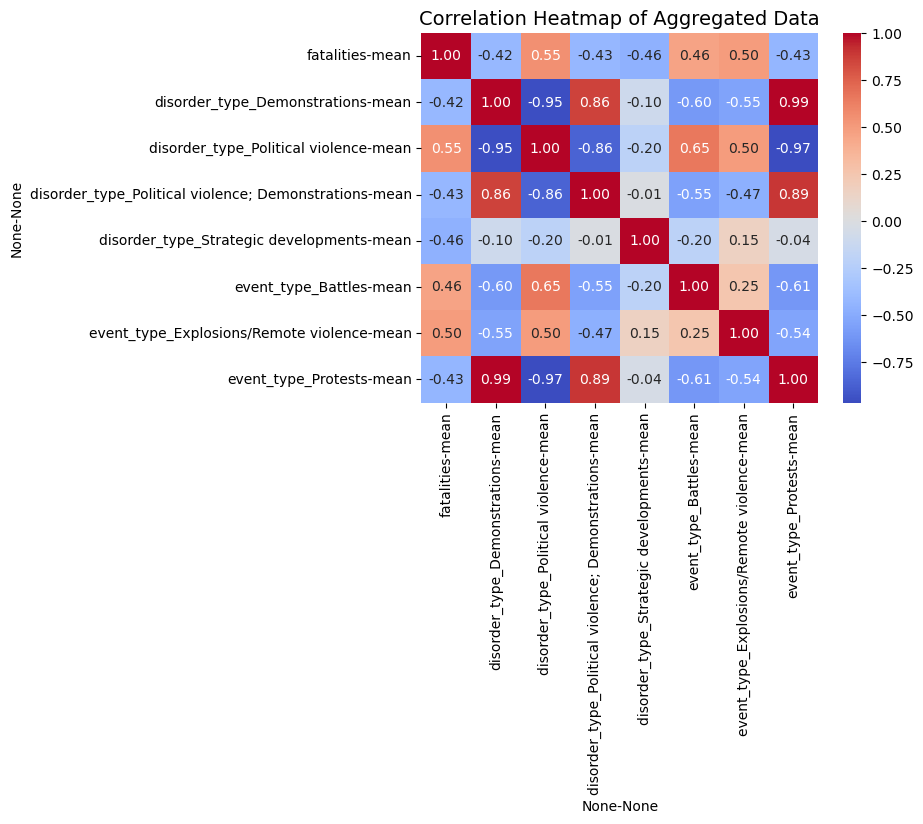

In [22]:
# Calculate the correlation matrix
correlation_matrix = grouped_df.agg(['mean']).corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title("Correlation Heatmap of Aggregated Data", fontsize=14)

# Show the plot
plt.show()

# Model Selection and training #

In [24]:
#Feature selection
#from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
#from itertools import combinations
#from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
# Prepare data for modeling
X = summary_stats.drop(['fatalities'], axis=1)
y = summary_stats['fatalities']


# Split data FIRST

# Split into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [25]:
# Scale X_train and X_val using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test =  pd.DataFrame(X_test_scaled, columns=X.columns)

X_train


,disorder_type_Demonstrations,disorder_type_Political violence,disorder_type_Political violence; Demonstrations,disorder_type_Strategic developments,event_type_Battles,event_type_Explosions/Remote violence,event_type_Protests
,mean,mean,mean,mean,mean,mean,mean
0,-0.062184,-0.196612,0.286997,0.672818,-0.144070,-0.593791,0.007137
1,3.277993,-3.175152,3.576348,-0.457802,-1.966187,-1.531043,3.421842
2,-0.826333,0.699569,-0.364326,0.303258,0.672871,-0.220407,-0.803365
3,-0.361954,0.502407,-0.211786,-0.413948,1.349126,-0.896957,-0.289357
4,0.231491,-0.230760,-0.148296,0.059643,-1.025399,1.215827,0.188832
5,-0.592586,0.849702,-0.817324,-0.668633,2.499676,-0.424120,-0.671497
6,-0.186671,0.477985,-0.817324,-0.705127,1.210126,0.680517,-0.361296
7,-0.526463,0.884811,-0.817324,-0.946141,0.660824,0.772717,-0.532926
8,-0.332384,0.606360,-0.817324,-0.677658,1.235828,0.544806,-0.408803


# LINEAR REGRESSION AS BASELINE MODEL #

In [27]:
# Create a LinearRegression model and fit it on scaled training data
regression = LinearRegression()
regression.fit(X_train, y_train)

# Calculate a baseline r-squared score on training data and validation

print("Train R^2:", r2_score((regression.predict(X_train)), y_train))
print("Test R^2:", r2_score((regression.predict(X_test)), y_test))



Train R^2: 0.4347308718794314
Test R^2: 0.3043523148504288


Observations:
Train R^2 :  (0.43)

The model explains 43% of the variance in the training dataset.

Test R^2: (0.30):

The model explains only 30 % of the variance in the test dataset.
This indicates the model is not generalizing well to unseen data

# Random Forest regressor as second model #

In [32]:
# Create and train the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [33]:

print("Train R^2:", r2_score((rf_regressor.predict(X_train)), y_train))
print("Test R^2:", r2_score((rf_regressor.predict(X_test)), y_test))

Train R^2: 0.8617894726016958
Test R^2: -0.33393212263004624


Training Set

Train R^2 ( 0.86):

This means that the model explains 86% of the variance in the target variable for the training data.

A high R² suggests that the model is fitting well in capturing patterns in the data effectively.

Test dataset

test R^2 -0.33

A negative R² indicates that the model performs worse than a simple baseline (e.g., predicting the mean of the target variable).

This suggests the model is overfitted or poorly generalized to unseen data.